In [2]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/OneDrive/Documents/Injury Dataset/2013-2022/2018-2022 Data Cleaned Trainable.csv')

X = pd.DataFrame(dataset.iloc[:,:22].values)
Y = pd.DataFrame(dataset.iloc[:,22:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# X_train.reshape(35276,22,1)
# X_test.reshape(8819,22,1)

print(X_train.shape)
print(Y_train.shape)

       0   1   2   3   4   5   6   7   8   9   ...  12  13  14   15  16  17  \
0       1   1   1   1   0   1   3  55   1   1  ...   0   0   1    0   0   1   
1       1   1   1   1   0   1   0  16   1   1  ...   0   0   1    0   0   1   
2       1   1   1   1   3   0   3  41   1   1  ...   0   1   1    0   1   1   
3       1   1   2   2   3   0   0  21   2   1  ...   0   0   1    0   0   1   
4       1   1   2   1   3   0   1  66   1   1  ...   0   0   1  174   0   1   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ...  ..  ..   
44090   2   4   1   2   0   1   0  53   1   1  ...   1   0   1    0   0   1   
44091   2   4   1   2   0   1   2  27   1   1  ...   1   0   1    0   1   1   
44092   2   4   1   2   1   0   1  25   1   1  ...   1   1   1  155   0   1   
44093   2   4   1   2   1   0   1  21   2   1  ...   1   1   1  120   0   0   
44094   2   4   1   1   0   1   1  43   1   1  ...   0   1   1   70   1   1   

       18  19  20  21  
0       2   2   3   1  
1  

In [3]:
features = pd.DataFrame(dataset.iloc[:,:32])
features = features.columns
print(features)

Index(['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP',
       'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG',
       'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ',
       'RUR_URB', 'FUNC_SYS', 'IMPACT1', 'INJ_SEV'],
      dtype='object')


In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from keras import layers

In [5]:
model = Sequential()

# LSTM layer
model.add(LSTM(128, input_shape=(22, 1), return_sequences=True))
model.add(Dropout(0.5))  # Regularization to avoid overfitting

# Another LSTM layer
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))

# Dense layer
model.add(Dense(32, activation='relu'))

# Output layer (binary classification)
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,Y_train,epochs = 200,batch_size=128)


Epoch 1/200


276/276 [==============================] - 24s 54ms/step - loss: 0.7358 - accuracy: 0.6669
Epoch 2/200
276/276 [==============================] - 15s 53ms/step - loss: 0.4665 - accuracy: 0.7741
Epoch 3/200
276/276 [==============================] - 14s 52ms/step - loss: 0.2951 - accuracy: 0.8585
Epoch 4/200
276/276 [==============================] - 15s 53ms/step - loss: 0.2588 - accuracy: 0.8799
Epoch 5/200
276/276 [==============================] - 16s 58ms/step - loss: 0.2427 - accuracy: 0.8882
Epoch 6/200
276/276 [==============================] - 16s 57ms/step - loss: 0.2346 - accuracy: 0.8932
Epoch 7/200
276/276 [==============================] - 16s 57ms/step - loss: 0.2242 - accuracy: 0.8993
Epoch 8/200
276/276 [==============================] - 16s 57ms/step - loss: 0.2227 - accuracy: 0.9008
Epoch 9/200
276/276 [==============================] - 15s 56ms/step - loss: 0.2142 - accuracy: 0.9039
Epoch 10/200
276/276 [==============================] - 16s 57ms/step 

In [6]:
def find_max_index(arr):
    # print(arr)
    # print(max_value)
    return np.argmax(arr)
res = model.predict(X_test)
actual = []
for num in res:
    actual.append(np.argmax(num))
from sklearn.metrics import classification_report
print(classification_report(Y_test,actual,digits=6))

276/276 [==============================] - 3s 8ms/step
              precision    recall  f1-score   support

           0   0.736076  0.743606  0.739822      1564
           1   0.765908  0.758820  0.762347      1729
           2   1.000000  1.000000  1.000000      5526

    accuracy                       0.907246      8819
   macro avg   0.833995  0.834142  0.834056      8819
weighted avg   0.907300  0.907246  0.907266      8819



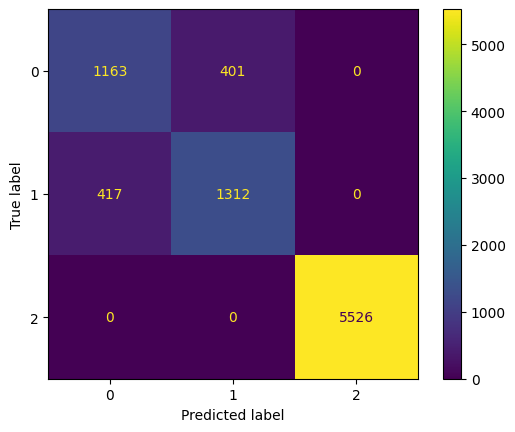

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, actual)
cm_display = ConfusionMatrixDisplay(confusionmatrix, display_labels=[0,1,2])
cm_display.plot()

In [ ]:
import shap
from sklearn.naive_bayes import CategoricalNB

explainer = shap.KernelExplainer(model.predict, X_test[:400])
shap_values = explainer.shap_values(X_test[:400])
shap_values = shap_values.squeeze()
# print(shap_values)
# shap.summary_plot(shap_values,X_test[:10],feature_names = features,plot_type="bar", plot_size=(20,15),show=False)
# print(shap_values.shape)
shap.summary_plot(shap_values[:,:,0],X_test[:400],feature_names = features, plot_size=(20,15),show=False)

c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


13/13 [==============================] - 0s 7ms/step


Using 400 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/400 [00:00<?, ?it/s]

26150/26150 [==============================] - 211s 8ms/step


  0%|          | 1/400 [03:52<25:43:27, 232.10s/it]

26150/26150 [==============================] - 231s 9ms/step


  0%|          | 2/400 [08:01<26:46:45, 242.22s/it]

26150/26150 [==============================] - 226s 9ms/step


  1%|          | 3/400 [12:05<26:48:46, 243.14s/it]

26150/26150 [==============================] - 224s 9ms/step


  1%|          | 4/400 [16:06<26:39:45, 242.39s/it]

26150/26150 [==============================] - 227s 9ms/step


  1%|▏         | 5/400 [20:10<26:39:10, 242.91s/it]

26150/26150 [==============================] - 225s 9ms/step


  2%|▏         | 6/400 [24:10<26:27:45, 241.79s/it]

26150/26150 [==============================] - 219s 8ms/step


  2%|▏         | 7/400 [28:03<26:05:14, 238.97s/it]

26150/26150 [==============================] - 221s 8ms/step


  2%|▏         | 8/400 [31:57<25:51:22, 237.46s/it]

26150/26150 [==============================] - 220s 8ms/step


  2%|▏         | 9/400 [35:53<25:43:28, 236.85s/it]

26150/26150 [==============================] - 223s 9ms/step


  2%|▎         | 10/400 [39:53<25:46:30, 237.93s/it]

26150/26150 [==============================] - 220s 8ms/step


  3%|▎         | 11/400 [43:50<25:40:54, 237.67s/it]

26150/26150 [==============================] - 223s 9ms/step


  3%|▎         | 12/400 [47:50<25:42:05, 238.47s/it]

26150/26150 [==============================] - 219s 8ms/step


  3%|▎         | 13/400 [51:47<25:34:22, 237.89s/it]

26150/26150 [==============================] - 221s 8ms/step


  4%|▎         | 14/400 [55:45<25:31:34, 238.07s/it]

26150/26150 [==============================] - 228s 9ms/step


  4%|▍         | 15/400 [59:47<25:34:34, 239.15s/it]

26150/26150 [==============================] - 229s 9ms/step


  4%|▍         | 16/400 [1:03:54<25:46:11, 241.59s/it]

26150/26150 [==============================] - 227s 9ms/step


  4%|▍         | 17/400 [1:07:58<25:46:18, 242.24s/it]

26150/26150 [==============================] - 228s 9ms/step


  4%|▍         | 18/400 [1:12:03<25:47:20, 243.04s/it]

26150/26150 [==============================] - 234s 9ms/step


  5%|▍         | 19/400 [1:16:11<25:53:32, 244.65s/it]

26150/26150 [==============================] - 229s 9ms/step


  5%|▌         | 20/400 [1:20:17<25:50:22, 244.79s/it]

26150/26150 [==============================] - 233s 9ms/step


  5%|▌         | 21/400 [1:24:27<25:56:34, 246.42s/it]

26150/26150 [==============================] - 237s 9ms/step


  6%|▌         | 22/400 [1:28:44<26:13:41, 249.79s/it]

26150/26150 [==============================] - 227s 9ms/step


  6%|▌         | 23/400 [1:32:46<25:53:11, 247.19s/it]

26150/26150 [==============================] - 216s 8ms/step


  6%|▌         | 24/400 [1:36:37<25:18:53, 242.38s/it]

26150/26150 [==============================] - 224s 9ms/step


  6%|▋         | 25/400 [1:40:39<25:15:28, 242.48s/it]

26150/26150 [==============================] - 223s 9ms/step


  6%|▋         | 26/400 [1:44:40<25:07:13, 241.80s/it]

26150/26150 [==============================] - 225s 9ms/step


  7%|▋         | 27/400 [1:48:42<25:04:50, 242.07s/it]

26150/26150 [==============================] - 229s 9ms/step


  7%|▋         | 28/400 [1:52:46<25:04:24, 242.65s/it]

26150/26150 [==============================] - 221s 8ms/step


  7%|▋         | 29/400 [1:56:41<24:45:20, 240.22s/it]

26150/26150 [==============================] - 229s 9ms/step


  8%|▊         | 30/400 [2:00:48<24:53:26, 242.18s/it]

26150/26150 [==============================] - 224s 9ms/step


  8%|▊         | 31/400 [2:04:49<24:48:40, 242.06s/it]

26150/26150 [==============================] - 234s 9ms/step


  8%|▊         | 32/400 [2:09:01<25:02:21, 244.95s/it]

26150/26150 [==============================] - 246s 9ms/step


  8%|▊         | 33/400 [2:13:21<25:25:28, 249.40s/it]

26150/26150 [==============================] - 223s 9ms/step


  8%|▊         | 34/400 [2:17:25<25:11:00, 247.71s/it]

26150/26150 [==============================] - 227s 9ms/step


  9%|▉         | 35/400 [2:21:29<25:00:25, 246.64s/it]

26150/26150 [==============================] - 227s 9ms/step


  9%|▉         | 36/400 [2:25:34<24:52:54, 246.08s/it]

26150/26150 [==============================] - 223s 9ms/step


  9%|▉         | 37/400 [2:29:32<24:35:02, 243.81s/it]

26150/26150 [==============================] - 224s 9ms/step


 10%|▉         | 38/400 [2:33:32<24:23:45, 242.61s/it]

26150/26150 [==============================] - 223s 9ms/step


 10%|▉         | 39/400 [2:37:32<24:15:26, 241.90s/it]

26150/26150 [==============================] - 228s 9ms/step


 10%|█         | 40/400 [2:41:38<24:17:55, 242.99s/it]

26150/26150 [==============================] - 225s 9ms/step


 10%|█         | 41/400 [2:45:39<24:10:22, 242.40s/it]

26150/26150 [==============================] - 224s 9ms/step


 10%|█         | 42/400 [2:49:43<24:09:24, 242.92s/it]

26150/26150 [==============================] - 228s 9ms/step


 11%|█         | 43/400 [2:53:48<24:09:06, 243.55s/it]

26150/26150 [==============================] - 228s 9ms/step


 11%|█         | 44/400 [2:57:53<24:07:06, 243.89s/it]

26150/26150 [==============================] - 225s 9ms/step


 11%|█▏        | 45/400 [3:01:57<24:03:56, 244.05s/it]

26150/26150 [==============================] - 227s 9ms/step


 12%|█▏        | 46/400 [3:06:01<24:00:40, 244.18s/it]

26150/26150 [==============================] - 228s 9ms/step


 12%|█▏        | 47/400 [3:10:07<23:59:01, 244.59s/it]

26150/26150 [==============================] - 230s 9ms/step


 12%|█▏        | 48/400 [3:14:17<24:05:08, 246.33s/it]

26150/26150 [==============================] - 226s 9ms/step


 12%|█▏        | 49/400 [3:18:19<23:52:20, 244.85s/it]

26150/26150 [==============================] - 225s 9ms/step


 12%|█▎        | 50/400 [3:22:18<23:38:52, 243.24s/it]

26150/26150 [==============================] - 227s 9ms/step


 13%|█▎        | 51/400 [3:26:23<23:36:48, 243.58s/it]

26150/26150 [==============================] - 224s 9ms/step


 13%|█▎        | 52/400 [3:30:25<23:30:24, 243.17s/it]

26150/26150 [==============================] - 223s 9ms/step


 13%|█▎        | 53/400 [3:34:25<23:20:47, 242.21s/it]

26150/26150 [==============================] - 227s 9ms/step


 14%|█▎        | 54/400 [3:38:26<23:14:17, 241.78s/it]

26150/26150 [==============================] - 228s 9ms/step


 14%|█▍        | 55/400 [3:42:32<23:17:29, 243.04s/it]

26150/26150 [==============================] - 229s 9ms/step


 14%|█▍        | 56/400 [3:46:39<23:21:25, 244.43s/it]

26150/26150 [==============================] - 228s 9ms/step


 14%|█▍        | 57/400 [3:50:44<23:18:36, 244.66s/it]

26150/26150 [==============================] - 226s 9ms/step


 14%|█▍        | 58/400 [3:54:44<23:04:59, 242.98s/it]

26150/26150 [==============================] - 226s 9ms/step


 15%|█▍        | 59/400 [3:58:46<23:00:29, 242.90s/it]

26150/26150 [==============================] - 225s 9ms/step


 15%|█▌        | 60/400 [4:02:48<22:54:18, 242.53s/it]

26150/26150 [==============================] - 228s 9ms/step


 15%|█▌        | 61/400 [4:06:52<22:52:32, 242.93s/it]

26150/26150 [==============================] - 227s 9ms/step


 16%|█▌        | 62/400 [4:10:53<22:45:56, 242.47s/it]

26150/26150 [==============================] - 227s 9ms/step


 16%|█▌        | 63/400 [4:14:57<22:44:38, 242.96s/it]

26150/26150 [==============================] - 225s 9ms/step


 16%|█▌        | 64/400 [4:19:00<22:39:42, 242.80s/it]

26150/26150 [==============================] - 227s 9ms/step


 16%|█▋        | 65/400 [4:23:04<22:37:51, 243.20s/it]

26150/26150 [==============================] - 228s 9ms/step


 16%|█▋        | 66/400 [4:27:06<22:31:21, 242.76s/it]

26150/26150 [==============================] - 229s 9ms/step


 17%|█▋        | 67/400 [4:31:12<22:33:21, 243.85s/it]

26150/26150 [==============================] - 226s 9ms/step


 17%|█▋        | 68/400 [4:35:16<22:29:06, 243.82s/it]

26150/26150 [==============================] - 228s 9ms/step


 17%|█▋        | 69/400 [4:39:19<22:23:43, 243.58s/it]

26150/26150 [==============================] - 223s 9ms/step


 18%|█▊        | 70/400 [4:43:17<22:11:22, 242.07s/it]

26150/26150 [==============================] - 226s 9ms/step


 18%|█▊        | 71/400 [4:47:20<22:08:52, 242.35s/it]

26150/26150 [==============================] - 231s 9ms/step


 18%|█▊        | 72/400 [4:51:28<22:13:31, 243.94s/it]

26150/26150 [==============================] - 225s 9ms/step


 18%|█▊        | 73/400 [4:55:27<22:02:02, 242.58s/it]

26150/26150 [==============================] - 229s 9ms/step


 18%|█▊        | 74/400 [4:59:34<22:04:18, 243.74s/it]

26150/26150 [==============================] - 231s 9ms/step


 19%|█▉        | 75/400 [5:03:43<22:08:58, 245.35s/it]

26150/26150 [==============================] - 226s 9ms/step


 19%|█▉        | 76/400 [5:07:44<21:58:03, 244.09s/it]

26150/26150 [==============================] - 227s 9ms/step


 19%|█▉        | 77/400 [5:11:45<21:48:56, 243.15s/it]

26150/26150 [==============================] - 226s 9ms/step


 20%|█▉        | 78/400 [5:15:49<21:45:51, 243.33s/it]

26150/26150 [==============================] - 229s 9ms/step


 20%|█▉        | 79/400 [5:19:55<21:46:32, 244.21s/it]

26150/26150 [==============================] - 229s 9ms/step


 20%|██        | 80/400 [5:23:59<21:41:50, 244.09s/it]

26150/26150 [==============================] - 230s 9ms/step


 20%|██        | 81/400 [5:28:05<21:41:33, 244.81s/it]

26150/26150 [==============================] - 225s 9ms/step


 20%|██        | 82/400 [5:32:08<21:33:31, 244.06s/it]

26150/26150 [==============================] - 226s 9ms/step


 21%|██        | 83/400 [5:36:10<21:27:08, 243.62s/it]

26150/26150 [==============================] - 228s 9ms/step


 21%|██        | 84/400 [5:40:12<21:20:43, 243.18s/it]

26150/26150 [==============================] - 223s 9ms/step


 21%|██▏       | 85/400 [5:44:12<21:11:45, 242.24s/it]

26150/26150 [==============================] - 229s 9ms/step


 22%|██▏       | 86/400 [5:48:19<21:14:20, 243.51s/it]

26150/26150 [==============================] - 229s 9ms/step


 22%|██▏       | 87/400 [5:52:25<21:13:48, 244.18s/it]

26150/26150 [==============================] - 233s 9ms/step


 22%|██▏       | 88/400 [5:56:34<21:17:25, 245.66s/it]

26150/26150 [==============================] - 233s 9ms/step


 22%|██▏       | 89/400 [6:00:45<21:21:47, 247.29s/it]

26150/26150 [==============================] - 233s 9ms/step


 22%|██▎       | 90/400 [6:04:55<21:22:03, 248.14s/it]

26150/26150 [==============================] - 234s 9ms/step


 23%|██▎       | 91/400 [6:09:02<21:16:47, 247.92s/it]

26150/26150 [==============================] - 230s 9ms/step


 23%|██▎       | 92/400 [6:13:10<21:12:30, 247.89s/it]

26150/26150 [==============================] - 228s 9ms/step


 23%|██▎       | 93/400 [6:17:16<21:04:57, 247.22s/it]

22168/26150 [========================>.....] - ETA: 35s

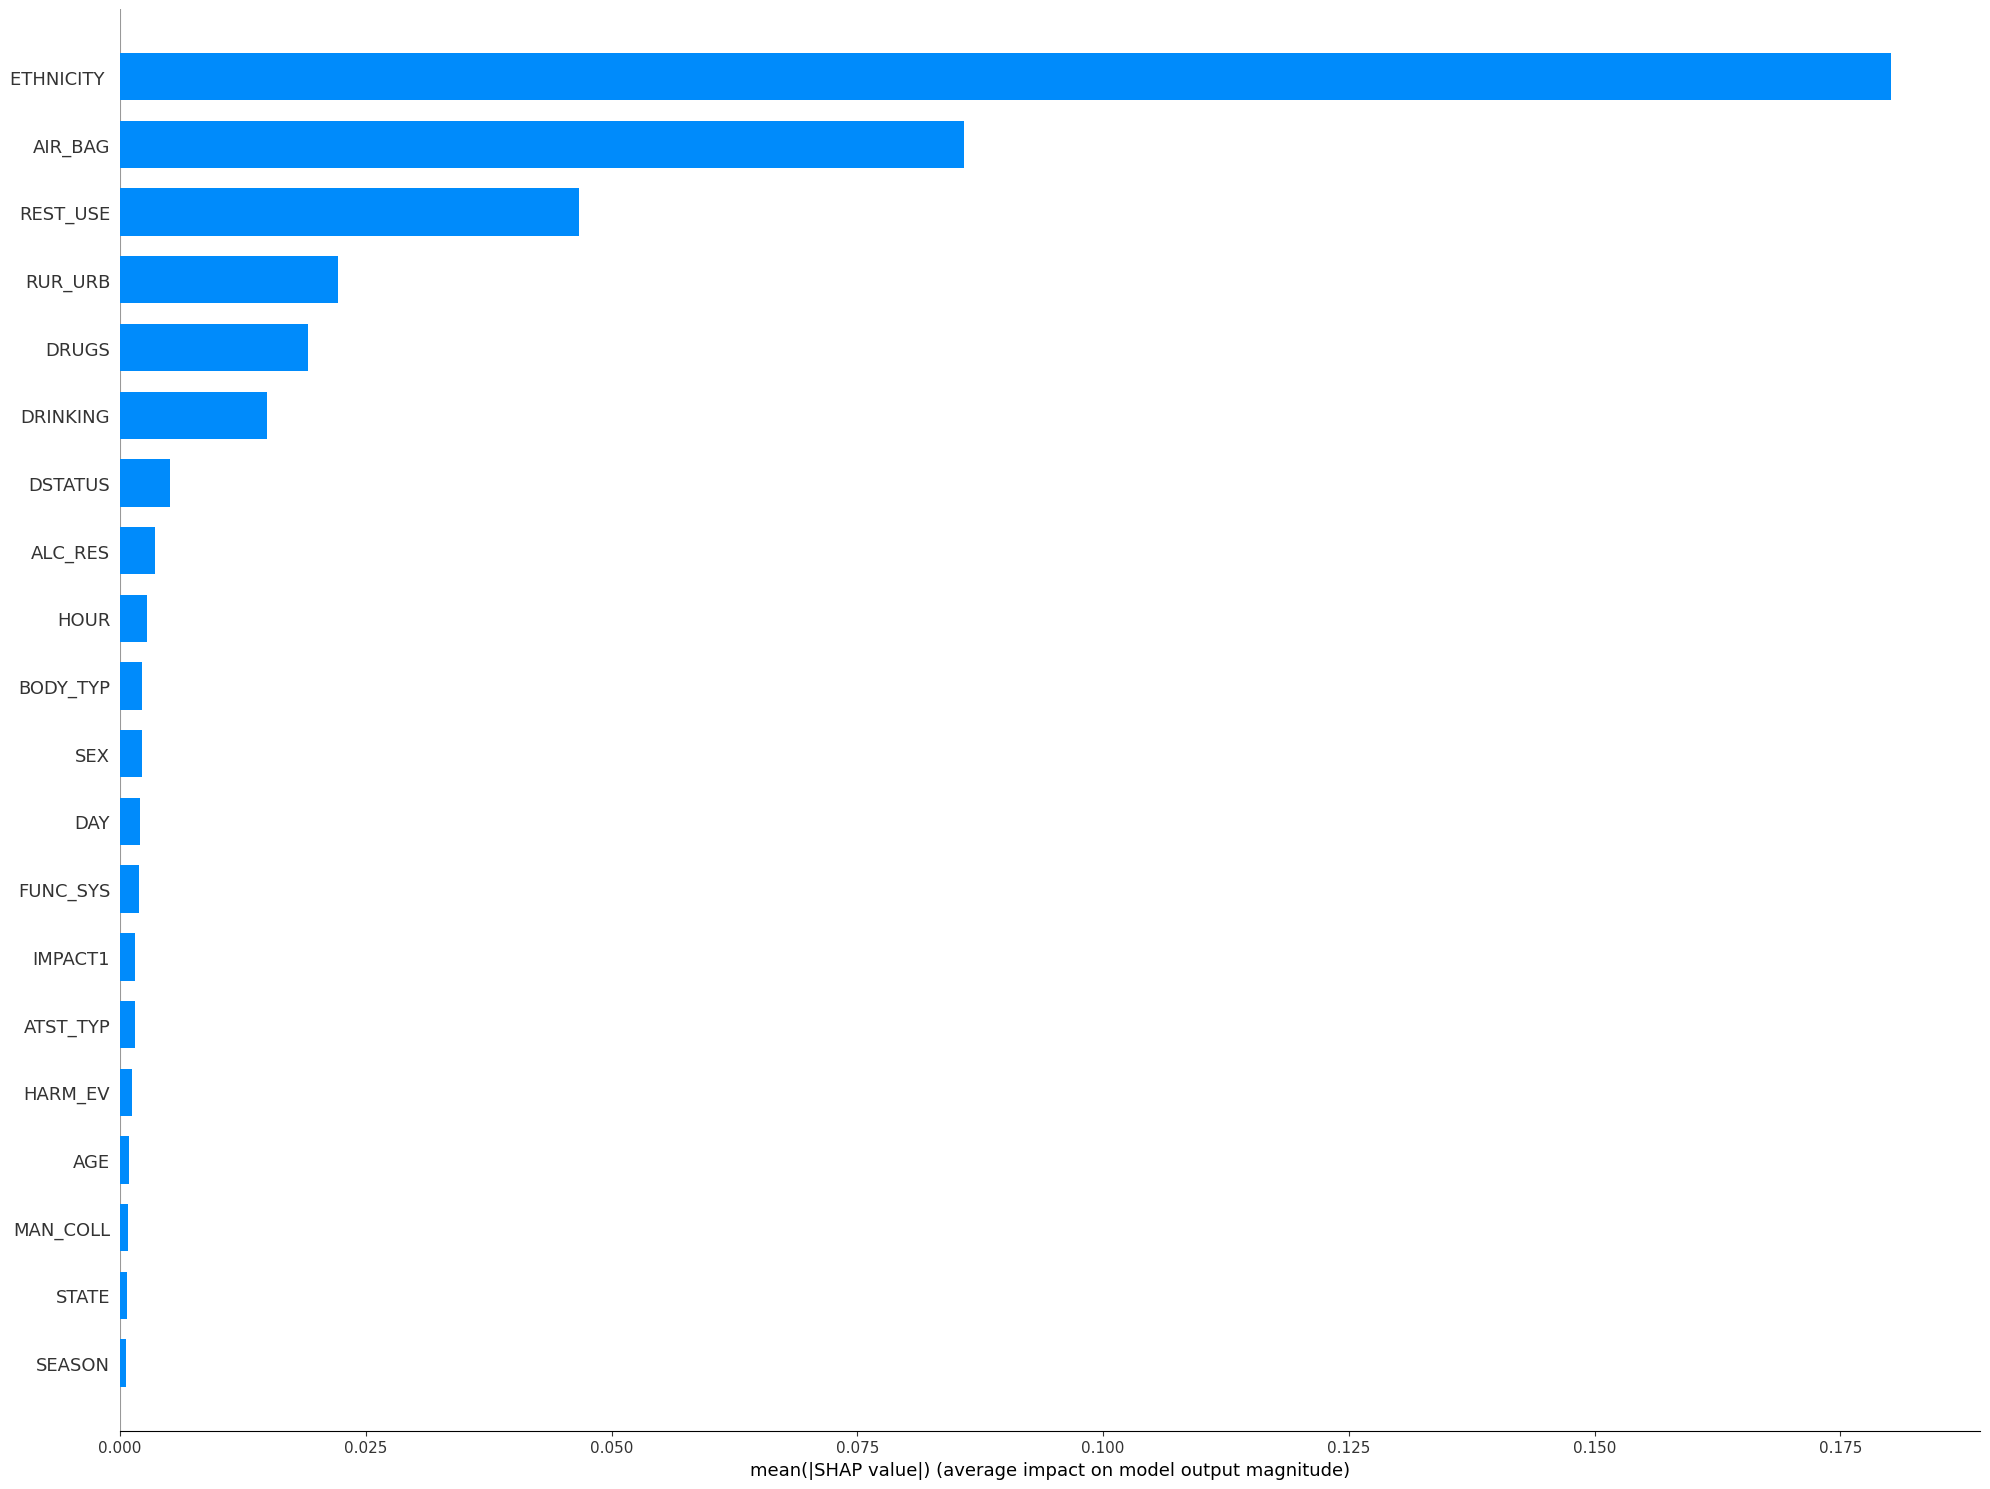

In [ ]:
shap.summary_plot(shap_values[:,:,0],X_test[:400],feature_names = features,plot_type="bar", plot_size=(20,15),show=False)